<a href="https://colab.research.google.com/github/Michael2004-ukpeh/perceptron-algorithm/blob/master/Linear_Regression_with_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Dataset


In [ ]:
X = np.array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
     2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
     5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
     7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

Y = np.array([ 2.60943416,  1.76213705,  7.18511292,  9.40744522,  5.46635068,
     8.6061673 , 13.30831239, 14.26225166, 16.70323979, 16.87285951,
    22.17984858, 23.81874177, 24.23732455, 28.20185083, 28.72449237,
    27.91299402, 32.21118578, 31.39802427, 36.91479534, 36.90014818])

# Define Utility Functions

In [ ]:
def pred(X, m, c):
  return m * X + c

In [ ]:
def compute_mse(y, y_):
  """
  y are original values on the y axis
  y_ are predicted values based on the line equation
  """

  return np.mean((y -  y_)**2)

### Gradient Descent
We calculate the changes towards reducing the cost function till J tends to 0

In [ ]:
def gradient_change(X, Y, m_curr, c_curr):
  """
  X is the independent variable
  Y is the dependent variable
  m_curr is the current value of m
  c_curr is the current value of c
  """
  n = X.shape[0]
  Y_ = pred(X, m_curr, c_curr)
  # Calculate error ( error minus original)
  error = Y - Y_
  # Calculate gradients
  m_gradient = (-2.0/n) * np.sum(error * X)
  c_gradient = (-2.0/n) * np.sum(error)
  return m_gradient, c_gradient


# Train with Gradient Descent

1.   Calculate prediction
2.   Compute error
3.   Calculate the gradients w.r.t m and c to help fit the data
4.  Update m and c iteratively in every epoch to reduce error to its minimum value



In [ ]:
def train(X, Y, m, c, learning_rate, epochs, m_arr, c_arr, err_arr):

  for i in range(epochs):
    # Compute current loss function
    Y_ = pred(X, m, c)
    mse = compute_mse(Y, Y_)
    m_gradient, c_gradient = gradient_change(X, Y, m, c)

    # Track errors , m and c
    m_arr.append(m)
    c_arr.append(c)
    err_arr.append(mse)

    # Adjust parameters
    m  -= learning_rate * m_gradient
    c  -= learning_rate * c_gradient

    print(f"Epoch {i}: MSE = {mse}\n")
  print(f"Final parameters -  m:{m} | c:{c}")
  return m, c, m_arr, c_arr, err_arr



Train Model with initial values of m and c and learning rate




In [ ]:
m = 0
c = 0
learning_rate = 0.01
m_arr = []
c_arr = []
err_arr = []
epochs = 100
m, c, m_arr, c_arr, err_arr = train(X, Y, m, c, learning_rate, epochs, m_arr, c_arr, err_arr)


Epoch 0: MSE = 499.6111730062909

Epoch 1: MSE = 48.0193235534004

Epoch 2: MSE = 7.086096131836733

Epoch 3: MSE = 3.373959700508118

Epoch 4: MSE = 3.035471320605642

Epoch 5: MSE = 3.002783292865769

Epoch 6: MSE = 2.9978333594670312

Epoch 7: MSE = 2.995418431614623

Epoch 8: MSE = 2.99325394475838

Epoch 9: MSE = 2.99113261430663

Epoch 10: MSE = 2.989035437407186

Epoch 11: MSE = 2.9869604788548996

Epoch 12: MSE = 2.984907352651258

Epoch 13: MSE = 2.982875815428266

Epoch 14: MSE = 2.9808656389366446

Epoch 15: MSE = 2.978876598465432

Epoch 16: MSE = 2.976908471769563

Epoch 17: MSE = 2.974961038950134

Epoch 18: MSE = 2.9730340824212083

Epoch 19: MSE = 2.9711273868847323

Epoch 20: MSE = 2.969240739306423

Epoch 21: MSE = 2.967373928891938

Epoch 22: MSE = 2.9655267470633317

Epoch 23: MSE = 2.963698987435757

Epoch 24: MSE = 2.9618904457944053

Epoch 25: MSE = 2.9601009200716786

Epoch 26: MSE = 2.958330210324617

Epoch 27: MSE = 2.95657811871257

Epoch 28: MSE = 2.95484444

# Plot Cost Function against number of epochs


/tmp/ipython-input-94330842.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


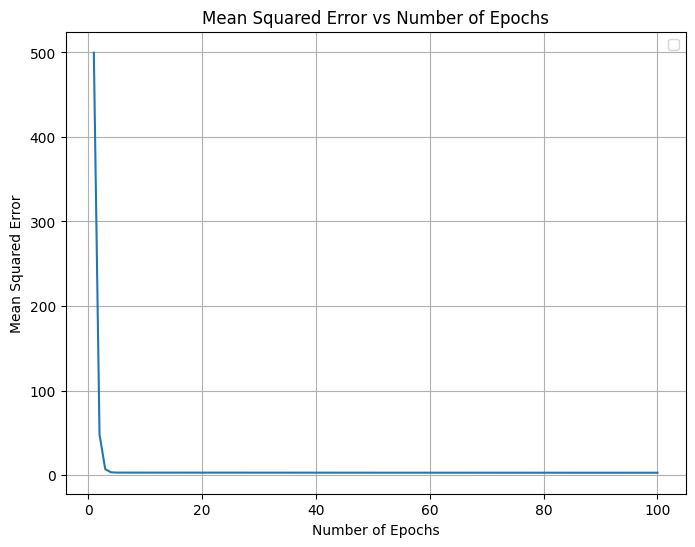

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs + 1 ),err_arr)

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Number of Epochs")
plt.grid(True)
plt.legend()

plt.show()

# Print Final Results


In [ ]:
print("\n Final model parameters:")
print(f" Slope(m) = {m}")
print(f" Y - intercept (c) = {c}")


 Final model parameters:
 Slope(m) = 3.674822733724472
 Y - intercept (c) = 0.9198021141360274


# Plot Values of X and Y with line of best fit


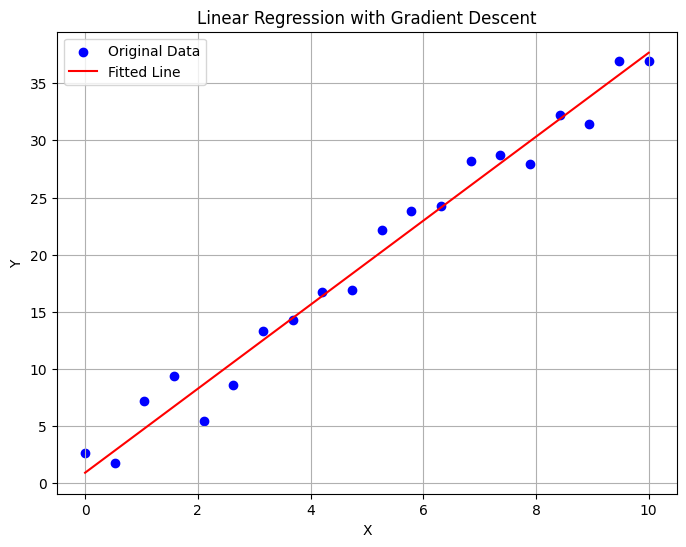

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter( X, Y, color='blue', label='Original Data')
plt.plot(X, pred(X, m, c), color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()